# 📈 MDANALYSIS 📊

**BELAKTIB Anas -- ROUAUD Lucas**

***2d year of Master in bioinformatics, Unversité Paris Cité***

> **📝 DESCRIPTION:**
>
> This notebook is done to analyze input trajectories data. The objectives are to compute:
> 1. Minimisation energy plot.
> 2. Temperature, pression and density plot.
> 3. Secondary structure stability.
> 4. RMSD.
> 5. RMSF.

## 📶 MODULE IMPORTATION

In [3]:
# Full package importation.
# [M]
import matplotlib.pyplot as plot
import matplotlib as mat
# [N]
import numpy as np
# [O]
import os
# [P]
import plotly.graph_objects as go
# [S]
import sys

# Partial package importation.
# [M]
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## 📂 ASKING INPUT FILES

In [4]:
# ===========================
#
# 📉 MINIMISATION ENERGY PLOT
#
# ===========================

# Steepest descent xvg file.
STEEP_XVG:str = input("STEEPEST DESCENT XVG FILE")
# Conjugate gradient xvg file.
CG_XVG:str = input("CONJUGATE GRADIENT XVG FILE")

# =========================================
#
# 📊 TEMPERATURE, PRESSION AND DENSITY PLOT
#
# =========================================

# NVT xvg file.
NVT_XVG: str = input("NVT XVG FILE")
# NPT xvg file.
NPT_XVG: str = input("NPT XVG FILE")
# MD xvg file.
MD_XVG: str = input("MD XVG FILE")

# =====
#
# 🎥 MD
#
# =====

# NVT xvg file.
RMSD_XVG: str = input("RMSD XVG FILE")
# NPT xvg file.
RMSF_XVG: str = input("RMSF XVG FILE")

# =======================
#
# 📂 CHECK FILE EXISTENCE
#
# =======================

file_list: "list[str]" = [STEEP_XVG, CG_XVG, NVT_XVG, NPT_XVG, MD_XVG, RMSD_XVG,
                          RMSF_XVG]

for path in file_list:
    if not os.path.exists(path):
        assert False, f"The next path does not exist: \"{path}\""

## 📜 DEFINING FUNCTION

In [34]:
def read_xvg(path: str, to_print: bool = False):
    """Read a xvg file.

    Parameters
    ----------
    path : str
        The path to the xvg file.

    Returns
    -------
    list[list[float]]
        A list of read data.
    """
    data: "list[list[int]]" = []

    with open(path, "r", encoding="utf-8") as file:
        for line in file:
            if line.startswith("@ s") and to_print:
                print(line)
                continue
            elif not line.startswith(" "):
                continue
            else:
                to_int: "list[float]" = []

                for str in line.split():
                    to_int += [float(str)]

                data += [to_int]

    return data


## 📉 MINIMISATION ENERGY PLOT

Here, we compute plot to show that the potential energy have been correctly minimized.

### 📕 Steepest decent

Here is the plot of the minimisation done with the steepest descent algorithm.

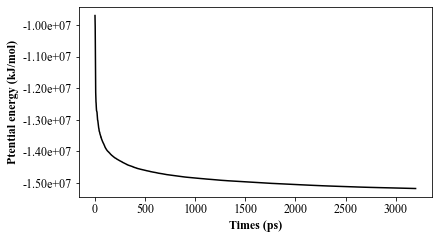

In [35]:
%matplotlib inline

# =================
#
# MATPLOTLIB FIGURE
#
# =================

steep: "list[list[float]]" = read_xvg(STEEP_XVG)

# Data to plot.
x: "list[float]" = []
y: "list[float]" = []

for data in steep:
    x += [data[0]]   
    y += [data[1]]

# Set font type.
font = {"family": "Times New Roman", "size": 12}
plot.rc("font", **font)

# Set figure size.
f = plot.figure()
f.set_figwidth(6.32)
f.set_figheight(3.5)

plot.tight_layout(pad=0)

# Set the axis style to scientific notation.
plot.gca().get_yaxis().set_major_formatter(mat.ticker.FormatStrFormatter("%.2e"))

# Set labels.
plot.xlabel("Times (ps)", fontweight="bold")
plot.ylabel("Ptential energy (kJ/mol)", fontweight="bold")

# Plot the figure.
plot.plot(x, y, "-k")
plot.savefig("STEEP.pdf", bbox_inches="tight")

In [36]:
# =============
#
# PLOTLY FIGURE
#
# =============

plot_res = go.Figure()

viridis = cm.get_cmap('viridis', 1)

plot_res.add_trace(go.Line(
    x=x,
    y=y,
    name="Potential energy",
    line=dict(color=colors.rgb2hex(viridis(0)))
))

plot_res.add_shape(
    # Rectangle with reference to the plot
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(
        color="black",
        width=1,
    )
)

plot_res["data"][0]["showlegend"]=True

plot_res.update_layout(
    plot_bgcolor='white',
    xaxis_title="<b>Times (ps)</b>",
    yaxis_title="<b>Potential energy (kJ/mol)</b>",
    legend_title="<b>Plot the potential energy<br />minimization by steepest<br />descent algorithm</b>",
)

plot_res.update_xaxes(showline=True, linewidth=1, linecolor="black")
plot_res.update_yaxes(showline=True, linewidth=1, linecolor="black", tickformat= ".2e")

plot_res.write_html(
    "STEEP.html",
    full_html=False,
    include_plotlyjs=True
)

plot_res.show()

/home/rouaud/miniconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### 📘 Conjugate gradient

Here is a table of the minimisation done with the conjugate gradient algorithm. A table is display because there is too few data to plot something correctly.

In [37]:
%matplotlib inline

steep: "list[list[float]]" = read_xvg(CG_XVG)

# Data to plot.
x: "list[float]" = []
y: "list[float]" = []

print("=" * 29)
print("| time |       energy       |")
print("|  ps  |       kJ/mol       |")
print("=" * 29)

with open("CG.csv", "w", encoding="utf-8") as file:
    file.write("time_ps,energy_kj_mol\n")

    for data in steep:
        print(f"| {data[0]:>4.0f} | {data[1]:>18.0f} |")
        file.write(f"{data[0]},{data[1]}\n")

print("=" * 29)

| time |       energy       |
|  ps  |       kJ/mol       |
|    0 |          -15169400 |
|    0 |          -15169755 |


## 📊 TEMPERATURE, PRESSION AND DENSITY PLOT

### 🌡 NVT

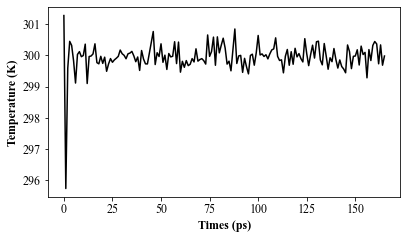

In [38]:
%matplotlib inline

steep: "list[list[float]]" = read_xvg(NVT_XVG)

# Data to plot.
x: "list[float]" = []
y: "list[float]" = []

for data in steep:
    x += [data[0]]   
    y += [data[1]]

# Set font type.
font = {"family": "Times New Roman", "size": 12}
plot.rc("font", **font)

# Set figure size.
f = plot.figure()
f.set_figwidth(6.32)
f.set_figheight(3.5)

plot.tight_layout(pad=0)

# Set labels.
plot.xlabel("Times (ps)", fontweight="bold")
plot.ylabel("Temperature (K)", fontweight="bold")

# Plot the figure.
plot.plot(x, y, "-k")
plot.savefig("NVT.pdf", bbox_inches="tight")

In [39]:
# =============
#
# PLOTLY FIGURE
#
# =============

plot_res = go.Figure()

viridis = cm.get_cmap('viridis', 1)

plot_res.add_trace(go.Line(
    x=x,
    y=y,
    name="Temperature",
    line=dict(color=colors.rgb2hex(viridis(0)))
))

plot_res.add_shape(
    # Rectangle with reference to the plot
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(
        color="black",
        width=1,
    )
)

plot_res["data"][0]["showlegend"]=True

plot_res.update_layout(
    plot_bgcolor='white',
    xaxis_title="<b>Times (ps)</b>",
    yaxis_title="<b>Temperature (K)</b>",
    legend_title="<b>Plot of the temperature<br />evolution during the<br />simulation</b>",
)

plot_res.update_xaxes(showline=True, linewidth=1, linecolor="black")
plot_res.update_yaxes(showline=True, linewidth=1, linecolor="black", tickformat= ".2e")

plot_res.write_html(
    "NVT.html",
    full_html=False,
    include_plotlyjs=True
)

plot_res.show()

/home/rouaud/miniconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### 🎈 NPT

@ s0 legend "Temperature"

@ s1 legend "Pressure"

@ s2 legend "Density"



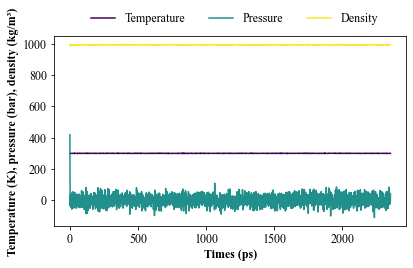

In [40]:
%matplotlib inline

steep: "list[list[float]]" = read_xvg(NPT_XVG, to_print=True)

# Data to plot.
x: "list[float]" = []
temp: "list[float]" = []
pres: "list[float]" = []
dens: "list[float]" = []

for data in steep:
    x += [data[0]]   
    temp += [data[1]]
    pres += [data[2]]
    dens += [data[3]]

# Set font type.
font = {"family": "Times New Roman", "size": 12}
plot.rc("font", **font)

# Set figure size.
f = plot.figure()
f.set_figwidth(6.32)
f.set_figheight(3.5)

plot.tight_layout(pad=0)

# Set labels.
plot.xlabel("Times (ps)", fontweight="bold")
plot.ylabel("Temperature (K), pressure (bar), density (kg/m³)", fontweight="bold")

# Plot the figure.
plot.plot(x, temp, "#440154", label="Temperature")
plot.plot(x, pres, "#21908c", label="Pressure")
plot.plot(x, dens, "#fde725", label="Density")

# Adding a legend with white border and background.
plot.legend(
    loc="lower right",
    facecolor="white",
    framealpha=1,
    ncol=3,
    bbox_to_anchor=(0.95, 1)
).get_frame().set_edgecolor("white")

plot.savefig("NPT.pdf", bbox_inches="tight")

In [41]:
# =============
#
# PLOTLY FIGURE
#
# =============

plot_res = go.Figure()

viridis = cm.get_cmap('viridis', 4)

plot_res.add_trace(go.Line(
    x=x,
    y=temp,
    name="Temperature",
    line=dict(color=colors.rgb2hex(viridis(0)))
))

plot_res.add_trace(go.Line(
    x=x,
    y=pres,
    name="Pressure",
    line=dict(color=colors.rgb2hex(viridis(1)))
))

plot_res.add_trace(go.Line(
    x=x,
    y=dens,
    name="Density",
    line=dict(color=colors.rgb2hex(viridis(2)))
))

plot_res.add_shape(
    # Rectangle with reference to the plot
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(
        color="black",
        width=1,
    )
)

plot_res["data"][0]["showlegend"]=True

plot_res.update_layout(
    plot_bgcolor='white',
    xaxis_title="<b>Times (ps)</b>",
    yaxis_title="<b>Temperature (K), pressure (bar),<br />density (kg/m³)</b>",
    legend_title="<b>Plot of temperature, pressure<br />and density evolution during<br />the simulation</b>",
)

plot_res.update_xaxes(showline=True, linewidth=1, linecolor="black")
plot_res.update_yaxes(showline=True, linewidth=1, linecolor="black")

plot_res.write_html(
    "NPT.html",
    full_html=False,
    include_plotlyjs=True
)

plot_res.show()

/home/rouaud/miniconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### 🎥 MD

### 🖩 RMSD

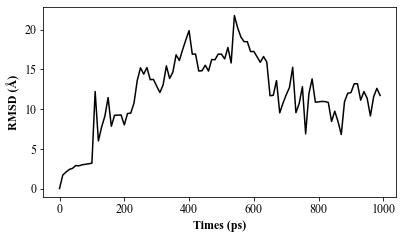

In [42]:
%matplotlib inline

steep: "list[list[float]]" = read_xvg(RMSD_XVG)

# Data to plot.
x: "list[float]" = []
y: "list[float]" = []

for data in steep:
    x += [data[0]]   
    y += [data[1] * 10]

# Set font type.
font = {"family": "Times New Roman", "size": 12}
plot.rc("font", **font)

# Set figure size.
f = plot.figure()
f.set_figwidth(6.32)
f.set_figheight(3.5)

plot.tight_layout(pad=0)

# Set labels.
plot.xlabel("Times (ps)", fontweight="bold")
plot.ylabel("RMSD (Å)", fontweight="bold")

# Plot the figure.
plot.plot(x, y, "-k")
plot.savefig("RMSD.pdf", bbox_inches="tight")

In [43]:
# =============
#
# PLOTLY FIGURE
#
# =============

plot_res = go.Figure()

viridis = cm.get_cmap('viridis', 1)

plot_res.add_trace(go.Line(
    x=x,
    y=y,
    name="RMSD",
    line=dict(color=colors.rgb2hex(viridis(0)))
))

plot_res.add_shape(
    # Rectangle with reference to the plot
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(
        color="black",
        width=1,
    )
)

plot_res["data"][0]["showlegend"]=True

plot_res.update_layout(
    plot_bgcolor='white',
    xaxis_title="<b>Times (ps)</b>",
    yaxis_title="<b>RMSD (Å)</b>",
    legend_title="<b>RMSD based on Cɑ and<br />first frame simulation</b>",
)

plot_res.update_xaxes(showline=True, linewidth=1, linecolor="black")
plot_res.update_yaxes(showline=True, linewidth=1, linecolor="black")

plot_res.write_html(
    "RMSD.html",
    full_html=False,
    include_plotlyjs=True
)

plot_res.show()

/home/rouaud/miniconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### ⌨️ RMSF

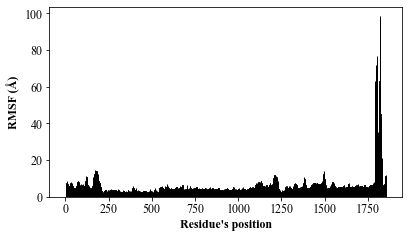

In [44]:
%matplotlib inline

steep: "list[list[float]]" = read_xvg(RMSF_XVG)

# Data to plot.
x: "list[float]" = []
y: "list[float]" = []

for data in steep:
    x += [data[0]]   
    y += [data[1] * 10]

# Set font type.
font = {"family": "Times New Roman", "size": 12}
plot.rc("font", **font)

# Set figure size.
f = plot.figure()
f.set_figwidth(6.32)
f.set_figheight(3.5)

plot.tight_layout(pad=0)

# Set labels.
plot.xlabel("Residue's position", fontweight="bold")
plot.ylabel("RMSF (Å)", fontweight="bold")

# Plot the figure.
plot.bar(x, y, color="w", edgecolor="k")
plot.savefig("RMSF.pdf", bbox_inches="tight")

In [47]:
# =============
#
# PLOTLY FIGURE
#
# =============

plot_res = go.Figure()

viridis = cm.get_cmap('viridis', 1)

plot_res.add_trace(go.Bar(
    x=x,
    y=y,
    name="RMSF",
    marker=dict(color=colors.rgb2hex(viridis(0)))
))

plot_res.add_shape(
    # Rectangle with reference to the plot
    type="rect",
    xref="paper",
    yref="paper",
    x0=0,
    y0=0,
    x1=1.0,
    y1=1.0,
    line=dict(
        color="black",
        width=1,
    )
)

plot_res["data"][0]["showlegend"]=True

plot_res.update_layout(
    plot_bgcolor='white',
    xaxis_title="<b>Residue's position</b>",
    yaxis_title="<b>RMSF (Å)</b>",
    legend_title="<b>RMSF based<br />on residue</b>",
)

plot_res.update_xaxes(showline=True, linewidth=1, linecolor="black")
plot_res.update_yaxes(showline=True, linewidth=1, linecolor="black")

plot_res.write_html(
    "RMSF.html",
    full_html=False,
    include_plotlyjs=True
)

plot_res.show()